In [1]:
from pymongo import MongoClient
from urllib.parse import quote_plus
from pprint import pprint
import pandas as pd
from pandas.io.json import json_normalize
import datetime
import time
import gensim
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from num2words import num2words
import numpy as np
import nltk
import os
import string
import matplotlib.gridspec as gridspec
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [101]:
df = pd.read_csv('stories_features.csv')
#df

In [102]:
# each product/item has 10 features in the raw dataset.
df.columns # prints column-names or feature-names.

Index(['True', 'story_id', 'title', 'tags', 'views', 'geo_scope', 'word_count',
       'category', 'sentiment', '_id'],
      dtype='object')

In [103]:
data = df[['story_id','title', 'tags', 'views', 'geo_scope', 'word_count',
       'category', 'sentiment']]

In [104]:
#data

In [105]:
print ('Number of data points : ', data.shape[0], \
       'Number of features:', data.shape[1])


Number of data points :  304931 Number of features: 8


In [106]:
# 1. title

print(data['title'].describe())
print("null values : ",data['title'].isnull().sum())

# find the 10 most frequent product_type_names.
product_title_count = Counter(list(data['title']))
product_title_count.most_common(10)

count     304425
unique    284104
top        crime
freq        3247
Name: title, dtype: object
null values :  506


[(' crime', 3247),
 (' civic amenities', 1519),
 (' education', 658),
 (' health', 587),
 (' crimc', 527),
 (nan, 506),
 (' cultural', 420),
 (' religion', 415),
 (' accident', 410),
 (' political', 384)]

In [107]:
data1 =data.loc[data['title'].isnull()]
#data1

In [108]:
data =data.loc[~data['title'].isnull()]
print('Number of data points After eliminating title=NULL :', data.shape[0])

Number of data points After eliminating title=NULL : 304425


In [109]:
#data

In [110]:
# 2. tags

print(data['tags'].describe())
print("null values : ",data['tags'].isnull().sum())

# find the 10 most frequent 
tags_count = Counter(list(data['tags']))
tags_count.most_common(10)

count                                                269690
unique                                               196608
top       hindi shayari hindi poetry hindi kavita hindi ...
freq                                                  33522
Name: tags, dtype: object
null values :  34735


[(nan, 34735),
 ('hindi shayari hindi poetry hindi kavita hindi poems हिंदी शायरी हिंदी कविता',
  33522),
 ('crime', 3745),
 ('civic amenities', 1586),
 ('accident', 776),
 ('education', 738),
 ('health', 631),
 ('political', 559),
 ('crimc', 507),
 ('cultural', 457)]

In [111]:
data2 =data.loc[data['tags'].isnull()]
#data2

In [112]:
data =data.loc[~data['tags'].isnull()]
print('Number of data points After eliminating tags=NULL :', data.shape[0])

Number of data points After eliminating tags=NULL : 269690


In [113]:
#data

In [114]:
# 3. views

print(data['views'].describe())
print("null values : ",data['views'].isnull().sum())

count    2.696900e+05
mean     4.309139e+03
std      1.986893e+04
min      1.100000e+01
25%      1.400000e+02
50%      5.930000e+02
75%      2.843000e+03
max      5.226509e+06
Name: views, dtype: float64
null values :  0


In [115]:
# 4. geo_scope

print(data['geo_scope'].describe())
print("null values : ",data['geo_scope'].isnull().sum())

# find the 10 most frequent 
geo_scope_count = Counter(list(data['geo_scope']))
geo_scope_count.most_common(10)

count           269690
unique            5318
top       ['National']
freq             67861
Name: geo_scope, dtype: object
null values :  0


[("['National']", 67861),
 ('[]', 48776),
 ("['International']", 10642),
 ("['Bareilly']", 6929),
 ("['Delhi NCR', 'Delhi']", 5377),
 ("['Shimla', 'Himachal Pradesh']", 5115),
 ("['Lucknow', 'Uttar Pradesh']", 4875),
 ("['Kanpur', 'Uttar Pradesh']", 4201),
 ("['Prayagraj']", 3368),
 ("['Agra', 'Uttar Pradesh']", 3336)]

In [116]:
l=list(data['geo_scope'])
l1=[]
for i in l:
    if i=='[]':
        l1.append(np.nan)
    else:
        l1.append(i)
            
data['geo_scope']=l1
data['geo_scope']

0                       ['Delhi NCR', 'Gurugram']
1                          ['Delhi NCR', 'Delhi']
2                                             NaN
3         ['Gorakhpur', 'Uttar Pradesh', 'Delhi']
4                                             NaN
                           ...                   
304926                               ['National']
304927                               ['National']
304928                  ['Agra', 'Uttar Pradesh']
304929                               ['National']
304930                                        NaN
Name: geo_scope, Length: 269690, dtype: object

In [117]:
data3 =data.loc[data['geo_scope'].isnull()]
#data3

In [118]:
#data=data.dropna()
data =data.loc[~data['geo_scope'].isnull()]
print('Number of data points After eliminating geo_scope=NULL :', data.shape[0])
#data   

Number of data points After eliminating geo_scope=NULL : 220914


In [119]:
# 5. word_count

print(data['word_count'].describe())
print("null values : ",data['word_count'].isnull().sum())

count    220914.000000
mean        324.287981
std         212.305155
min           1.000000
25%         205.000000
50%         288.000000
75%         395.000000
max       17708.000000
Name: word_count, dtype: float64
null values :  0


In [120]:
# 6. category

print(data['category'].describe())
print("null values : ",data['category'].isnull().sum())

# find the 10 most frequent
category_count = Counter(list(data['category']))
category_count.most_common(10)

count            220914
unique              128
top       City & states
freq             124382
Name: category, dtype: object
null values :  0


[('City & states', 124382),
 ('India News', 23434),
 ('Bollywood', 13741),
 ('Crime', 11057),
 ('Cricket News', 6309),
 ('World', 5853),
 ('Education', 2694),
 ('Government Jobs', 2252),
 ('Auto News', 1903),
 ('Business Diary', 1790)]

In [121]:
#7. sentiment

print(data['sentiment'].describe())
print("null values : ",data['sentiment'].isnull().sum())

count    220914.000000
mean          0.083123
std           0.574123
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: sentiment, dtype: float64
null values :  0


In [122]:
data

,story_id,title,tags,views,geo_scope,word_count,category,sentiment
0,5c2aaecfbdec2256fe7bdae8,car driver hits police man gurugram dragged p...,gurugram traffic police gurugram police specia...,4141,"['Delhi NCR', 'Gurugram']",280.0,City & states,0
1,5c2ab1fcbdec2257043b8450,man recorded video bathing girl delhi,girl man recorded video delhi police,4521,"['Delhi NCR', 'Delhi']",375.0,City & states,0
3,5c2ac367bdec226d6e093a29,two entries register many people seen footage,ateeq ahmed deoria jail cctv footage,996,"['Gorakhpur', 'Uttar Pradesh', 'Delhi']",304.0,City & states,1
7,5c2ac894bdec2256e05154db,mohit stayed inside jail three hours,ateeq ahmed deoria jail cctv footage mohit,1528,"['Deoria', 'Uttar Pradesh']",341.0,City & states,-1
8,5c2acbb9bdec2256b421f4d9,maulana mufti tariq kasami says celebrating n...,happy new year two thousand and nineteen हैप्प...,2086,"['Meerut', 'Uttar Pradesh']",215.0,City & states,1
...,...,...,...,...,...,...,...,...
304925,5e09f8578ebc3e87db4268f7,new year two thousand twenty celebration tour...,tourists crowd in shimla new year two thousand...,13163,"['Chamba', 'Himachal Pradesh', 'Kullu', 'Natio...",300.0,City & states,1
304926,5e0a38908ebc3e87f7369703,ioa implements safe sports policy first time ...,ioa भारतीय ओलंपिक संघ आईओए सुरक्षित खेल नीति s...,186,['National'],341.0,Other Sports,1
304927,5e09e90d8ebc3e879937c401,use baking soda skin,baking soda for face mask बेकिंग सोडा चेहरे पर...,3425,['National'],266.0,Beauty tips,0
304928,5e09ff228ebc3e87b96e276f,agra university may cancelled recognition eig...,bed 2005 scam bed colleges dbra university agr...,2748,"['Agra', 'Uttar Pradesh']",430.0,City & states,0


In [123]:
data.to_pickle('pickels/220K_data')

In [124]:
# read data from pickle file from previous stage
data = pd.read_pickle('pickels/220K_data')
#data

In [125]:
# we use the list of stop words that are downloaded from nltk lib.
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

list of stop words: {'does', 'having', 'did', "won't", 'further', "you're", 'am', 'ours', 'for', 'll', "that'll", 'of', 'him', 'by', 'mustn', 'from', 'are', 'an', "don't", "haven't", "hadn't", 'if', 'can', "you've", 'didn', 'this', 'whom', 'i', 'me', 'down', 'after', 'my', 'them', 'between', 'on', 'd', 'were', 'there', 'than', 'up', 'themselves', 'm', 'over', 'as', 'their', "needn't", 'mightn', 'when', 'our', 'you', "you'd", 've', 'just', 'too', 'itself', 'shan', 'again', 'not', 'her', 'that', 'before', 'being', 'or', 'same', "shouldn't", 'no', 'a', 'both', "she's", 'now', 'in', 'own', 'because', 'is', 'hadn', 'ma', "couldn't", 'below', 'had', 'yourself', 'hers', 'weren', 'most', "it's", 'wouldn', 'any', 'who', 'but', 'theirs', 'what', 'other', 'hasn', "aren't", 'out', 'doing', 'ourselves', 'myself', 'each', 'your', 'they', 'needn', "mustn't", 'all', "hasn't", "shan't", "wouldn't", "weren't", 'off', 'isn', 'such', 'through', 's', 'why', 'been', 'she', 'about', 'here', 'doesn', 'so', 'w

In [126]:
'''start_time = time.clock()
# we take each title and we text-preprocess it.
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')
# we print the time it took to preprocess whole titles 
print(time.clock() - start_time, "seconds")'''

'start_time = time.clock()\n# we take each title and we text-preprocess it.\nfor index, row in data.iterrows():\n    nlp_preprocessing(row[\'title\'], index, \'title\')\n# we print the time it took to preprocess whole titles \nprint(time.clock() - start_time, "seconds")'

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape()

from sklearn.metrics.pairwise import pairwise_distances

import re

In [128]:
# Utility Functions which we will use through the rest of the code.

'''
#Display an image
def display_img(url,ax,fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)

'''

#plotting code to understand the algorithm's decision.
def plot_heatmap(keys, values, labels, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        #ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        #ax.grid(False)
        #ax.set_xticks([])
        #ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        #display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2,  text, model):

    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, text)


# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}



def get_result1(doc_id, content_a, content_b, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2,  text2, model)

In [129]:
#Bag of Words (BoW)

In [130]:
def bag_of_words_model(doc_id, num_results):
    
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result1(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]],  'bag_of_words')
        print('story_id :',data['story_id'].loc[df_indices[i]])
        print ('tags:', data['tags'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query input :', pdists[i])
        print('='*60)


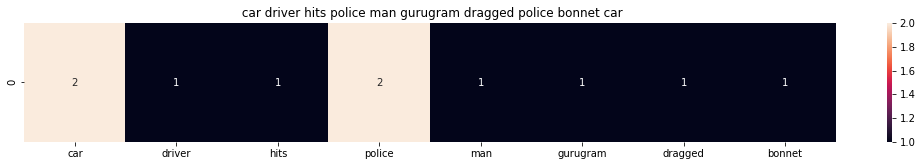

story_id : 5c2aaecfbdec2256fe7bdae8
tags: gurugram traffic police gurugram police special police officer
Title:  car driver hits police man gurugram dragged police bonnet car
Euclidean similarity with the query input : 0.0


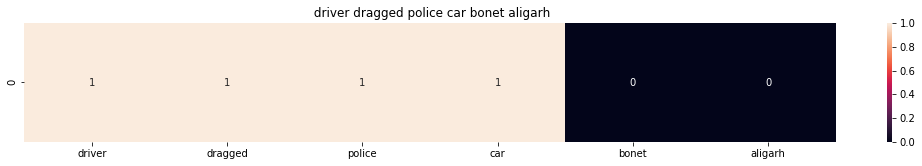

story_id : 5d21de398ebc3e6cd405f25d
tags: aligarh driver police up police car bonet अलीगढ़ कार यूपी पुलिस पुलिस
Title:  driver dragged police car bonet aligarh
Euclidean similarity with the query input : 2.8284271247461903


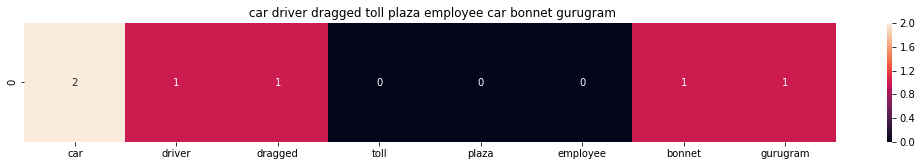

story_id : 5cb1e572bdec2214130e77f1
tags: gurugram toll plaza car car driver गुरुग्राम टोल प्लाजा कार कार ड्राइवर हिट एंड रन
Title:  car driver dragged toll plaza employee car bonnet gurugram
Euclidean similarity with the query input : 3.0


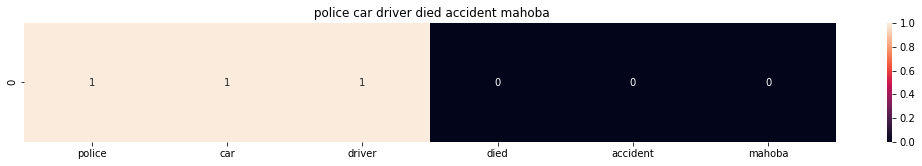

story_id : 5ccbe715bdec2207903d474d
tags: car driver died in accident police car driver died in accident accident in mahoba mahoba news
Title:  police car driver died accident mahoba
Euclidean similarity with the query input : 3.1622776601683795


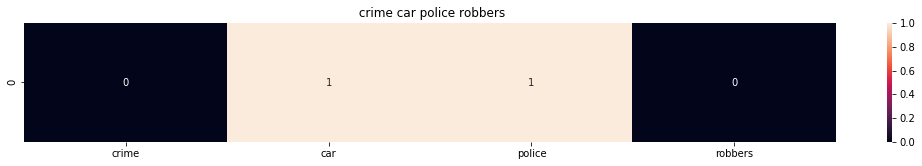

story_id : 5d6046788ebc3e017e52a0b7
tags: crime
Title:  crime car police robbers
Euclidean similarity with the query input : 3.1622776601683795


In [131]:

#call the bag-of-words model for a product to get similar products.
bag_of_words_model(0, 5) # change the index if you want to.


In [132]:
  # to get top 100 recommendation without pictorial rep.


def get_result(doc_id, content_a, content_b, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)
    return vector1, vector2

    #plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)
    
    
columns=[]
for i in range(100):
    s="story_id_{}".format(i)
    ta="tags_{}".format(i)
    ti="Title_{}".format(i)
    columns.append(s)
    columns.append(ta)
    columns.append(ti)
    
    
def bag_of_words_model_top_100(doc_id, num_results):
    
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    
    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(data.index[indices])
    
    d=dict()
    j=0
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2,  model
        v1,v2=get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], 'bag_of_words')
        #print('story_id :',data['story_id'].loc[df_indices[i]])
        #print ('tags:', data['tags'].loc[df_indices[i]])
        #print ('Title:', data['title'].loc[df_indices[i]])
        d[columns[j]]=data['story_id'].loc[df_indices[i]]
        j=j+1
        d[columns[j]]=data['tags'].loc[df_indices[i]]
        j=j+1
        d[columns[j]]=data['title'].loc[df_indices[i]]
        j=j+1
    return d
        #print ('Euclidean similarity with the query image :', pdists[i])
        #print('='*60)

#d=bag_of_words_model(1, 100) # change the index if you want to.

df=pd.DataFrame(columns=columns)
for i in range(100):
    d=bag_of_words_model_top_100(i, 100)
    df = df.append(d, ignore_index=True)
    

In [133]:
df.head()

,story_id_0,tags_0,Title_0,story_id_1,tags_1,Title_1,story_id_2,tags_2,Title_2,story_id_3,...,Title_96,story_id_97,tags_97,Title_97,story_id_98,tags_98,Title_98,story_id_99,tags_99,Title_99
0,5c2aaecfbdec2256fe7bdae8,gurugram traffic police gurugram police specia...,car driver hits police man gurugram dragged p...,5d21de398ebc3e6cd405f25d,aligarh driver police up police car bonet अलीग...,driver dragged police car bonet aligarh,5cb1e572bdec2214130e77f1,gurugram toll plaza car car driver गुरुग्राम ट...,car driver dragged toll plaza employee car bo...,5ccbe715bdec2207903d474d,...,gurugram police arrested gangster fired police,5d833eda8ebc3e01557e6921,motor vehicle act challan,people burst police black glass car,5de173f28ebc3e54c36d2274,suspecious death,man died suspiciously car,5d0a6b4c8ebc3e5a265b2aed,crime in gurugram gurugram police dmrc metro s...,man arrested gurugram police complaint woman
1,5c2ab1fcbdec2257043b8450,girl man recorded video delhi police,man recorded video bathing girl delhi,5d3749db8ebc3e6ccd346c86,civic amenities,hangig girl,5ca1008fbdec2213e272fa19,crime in kushinagar,संदिग्ध हाल में विवाहिता की मौत,5caa4477bdec22145e4828af,...,health,5db88bda8ebc3e93be635d3b,crime,crime,5de6b2368ebc3e55071b0c35,political,political,5db88c418ebc3e01451c36a5,crime,crime
2,5c2ac367bdec226d6e093a29,ateeq ahmed deoria jail cctv footage,two entries register many people seen footage,5caa4477bdec22145e4828af,gkp gkp news crime case marpeet police,गाड़ी में की तोड़फोड़ मालिक को पीटा,5cf3d5ecbdec2207626c5855,gorakhpur news news of gorakhpur aapkeliye mur...,प्रेमिका के भाई को गोली मारी प्रेमी को कुल्हा...,5c509700bdec227cde52e718,...,crime,5d26426a8ebc3e6d18101f1b,crime,crime,5d866a3a8ebc3e93de1249a8,loot,loot,5d97acaa8ebc3e93d56ccab8,dangal,dangal
3,5c2ac894bdec2256e05154db,ateeq ahmed deoria jail cctv footage mohit,mohit stayed inside jail three hours,5dd593908ebc3e5477445c8c,jail,jail,5dd98a2e8ebc3e549a77569e,jail,jail,5d51c8e08ebc3e6d0b74e5fc,...,crime,5ddace7a8ebc3e5474296df2,crimc,crimc,5d4f0f5b8ebc3e6d250dc903,cultural,cultural,5ddacc5a8ebc3e54853d4085,crimc,crimc
4,5c2acbb9bdec2256b421f4d9,happy new year two thousand and nineteen हैप्प...,maulana mufti tariq kasami says celebrating n...,5e0901a98ebc3e87e86b2700,celebration new year,celebration new year,5e0901a18ebc3e87a10e03e4,celebration new year,celebration new year,5e0a47ee8ebc3e88062d9d9d,...,health,5d62c65e8ebc3e01702cf3d9,health,health,5d62c65e8ebc3e014a68767e,crime,crime,5db99c548ebc3e0130773e59,crime,crime


In [134]:
#df.to_csv('top_100_recomendations_BOW.csv',index=False,encoding='UTF-8')

In [135]:
#tf_idf

In [136]:
# read data from pickle file from previous stage
data = pd.read_pickle('pickels/220K_data')
#data

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [138]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])


In [139]:
def tfidf_model(doc_id, num_results):
    
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, model
        get_result1(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]],  'tfidf')
        print('story_id :',data['story_id'].loc[df_indices[i]])
        print ('tags:', data['tags'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query input :', pdists[i])
        print('='*60)


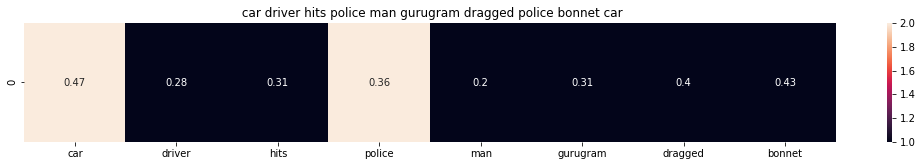

story_id : 5c2aaecfbdec2256fe7bdae8
tags: gurugram traffic police gurugram police special police officer
Title:  car driver hits police man gurugram dragged police bonnet car
Euclidean similarity with the query input : 0.0


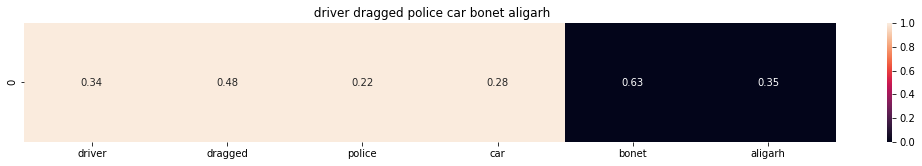

story_id : 5d21de398ebc3e6cd405f25d
tags: aligarh driver police up police car bonet अलीगढ़ कार यूपी पुलिस पुलिस
Title:  driver dragged police car bonet aligarh
Euclidean similarity with the query input : 2.8284271247461903


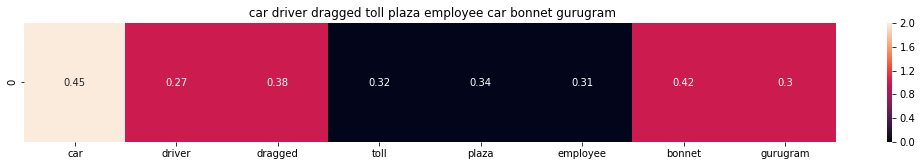

story_id : 5cb1e572bdec2214130e77f1
tags: gurugram toll plaza car car driver गुरुग्राम टोल प्लाजा कार कार ड्राइवर हिट एंड रन
Title:  car driver dragged toll plaza employee car bonnet gurugram
Euclidean similarity with the query input : 3.0


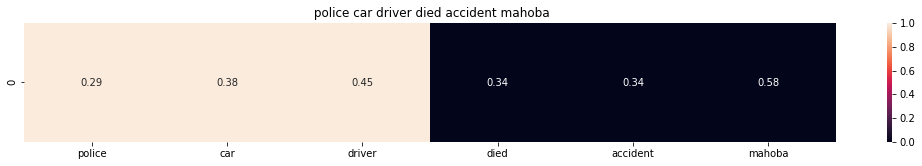

story_id : 5ccbe715bdec2207903d474d
tags: car driver died in accident police car driver died in accident accident in mahoba mahoba news
Title:  police car driver died accident mahoba
Euclidean similarity with the query input : 3.1622776601683795


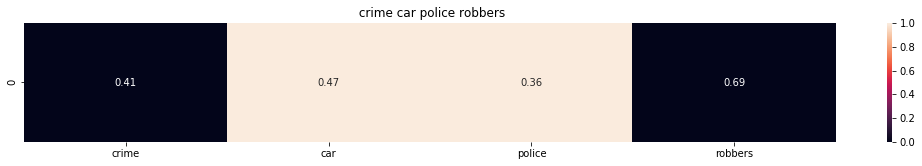

story_id : 5d6046788ebc3e017e52a0b7
tags: crime
Title:  crime car police robbers
Euclidean similarity with the query input : 3.1622776601683795


In [140]:

#call the bag-of-words model for a product to get similar products.
tfidf_model(0, 5) # change the index if you want to.


In [141]:
  # to get top 100 recommendation without pictorial rep.


def get_result(doc_id, content_a, content_b, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)
    return vector1, vector2

    #plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)
    
    
columns=[]
for i in range(100):
    s="story_id_{}".format(i)
    ta="tags_{}".format(i)
    ti="Title_{}".format(i)
    columns.append(s)
    columns.append(ta)
    columns.append(ti)
    
    
def tfidf_model_top_100(doc_id, num_results):
    
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    
    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(data.index[indices])
    
    d=dict()
    j=0
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2,  model
        v1,v2=get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], 'bag_of_words')
        #print('story_id :',data['story_id'].loc[df_indices[i]])
        #print ('tags:', data['tags'].loc[df_indices[i]])
        #print ('Title:', data['title'].loc[df_indices[i]])
        d[columns[j]]=data['story_id'].loc[df_indices[i]]
        j=j+1
        d[columns[j]]=data['tags'].loc[df_indices[i]]
        j=j+1
        d[columns[j]]=data['title'].loc[df_indices[i]]
        j=j+1
    return d
        #print ('Euclidean similarity with the query image :', pdists[i])
        #print('='*60)

#d=bag_of_words_model(1, 100) # change the index if you want to.

df=pd.DataFrame(columns=columns)
for i in range(100):
    d=tfidf_model_top_100(i, 100)
    df = df.append(d, ignore_index=True)
    

In [142]:
#tfidf_model_top_100(0, 5) # change the index if you want to.



In [143]:
#df

In [144]:
#df.to_csv('top_100_recomendations_tf_idf.csv',index=False,encoding='UTF-8')

In [145]:
#idf

In [146]:
# read data from pickle file from previous stage
data = pd.read_pickle('pickels/220K_data')
#data

In [147]:
import math

In [148]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])

# idf_title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# idf_title_features[doc_id, index_of_word_in_corpus] = number of times the word occured in that doc

In [151]:
def n_containing(word):
    # return the number of documents which had the given word
    return sum(1 for blob in data['title'] if word in blob.split())

def idf(word):
    # idf = log(#number of docs / #number of docs which had the given word)
    return math.log(data.shape[0] / (n_containing(word)))

In [150]:
# we need to convert the values into float
idf_title_features  = idf_title_features.astype(np.float)

for i in idf_title_vectorizer.vocabulary_.keys():
    # for every word in whole corpus we will find its idf value
    idf_val = idf(i)
    
    # to calculate idf_title_features we need to replace the count values with the idf values of the word
    # idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0] will return all documents in which the word i present
    for j in idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0]:
        
        # we replace the count values of word i in document j with  idf_value of word i 
        # idf_title_features[doc_id, index_of_word_in_courpus] = idf value of word
        idf_title_features[j,idf_title_vectorizer.vocabulary_[i]] = idf_val
        

KeyboardInterrupt: 

In [152]:
def idf_model(doc_id, num_results):

    pairwise_dist = pairwise_distances(idf_title_features,idf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

           
    d=dict()
    j=0
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2,  model
        v1,v2=get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], 'idf')
        #print('story_id :',data['story_id'].loc[df_indices[i]])
        #print ('tags:', data['tags'].loc[df_indices[i]])
        #print ('Title:', data['title'].loc[df_indices[i]])
        d[columns[j]]=data['story_id'].loc[df_indices[i]]
        j=j+1
        d[columns[j]]=data['tags'].loc[df_indices[i]]
        j=j+1
        d[columns[j]]=data['title'].loc[df_indices[i]]
        j=j+1
    return d
        #print ('Euclidean similarity with the query image :', pdists[i])
        #print('='*60)
        
idf_model(3,5)
# in the output heat map each value represents the idf values of the label word, the color represents the intersection with inputs title

{'story_id_0': '5c2ac894bdec2256e05154db',
 'tags_0': 'ateeq ahmed deoria jail cctv footage mohit',
 'Title_0': ' mohit stayed inside jail three hours',
 'story_id_1': '5dd98a2e8ebc3e549a77569e',
 'tags_1': 'jail',
 'Title_1': ' jail',
 'story_id_2': '5dd593908ebc3e5477445c8c',
 'tags_2': 'jail',
 'Title_2': ' jail',
 'story_id_3': '5cfa9b87bdec2207066cb881',
 'tags_3': 'suspend',
 'Title_3': ' चार वीडीओ निलंबित',
 'story_id_4': '5d2cb49f8ebc3e6ca164f957',
 'tags_4': 'rape jail',
 'Title_4': ' rape jail'}

In [153]:
df=pd.DataFrame(columns=columns)
for i in range(100):
    d=idf_model(i, 100)
    df = df.append(d, ignore_index=True)
    

In [154]:
#df

In [155]:
#df.to_csv('top_100_recomendations_idf.csv',index=False,encoding='UTF-8')

In [156]:
# word2vec

In [157]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle


In [158]:
with open('word2vec_model', 'rb') as handle:
    model = pickle.load(handle)


In [159]:
# Utility functions

def get_word_vec(sentence, doc_id, m_name):
    # sentence : title of the apparel
    # doc_id: document id in our corpus
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)
    vec = []
    for i in sentence.split():
        if i in vocab:
            if m_name == 'weighted' and i in  idf_title_vectorizer.vocabulary_:
                vec.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[i]] * model[i])
            elif m_name == 'avg':
                vec.append(model[i])
        else:
            # if the word in our courpus is not there in the google word2vec corpus, we are just ignoring it
            vec.append(np.zeros(shape=(300,)))
    # we will return a numpy array of shape (#number of words in title * 300 ) 300 = len(w2v_model[word])
    # each row represents the word2vec representation of each word (weighted/avg) in given sentance 
    return  np.array(vec)

def get_distance(vec1, vec2):
    # vec1 = np.array(#number_of_words_title1 * 300), each row is a vector of length 300 corresponds to each word in give title
    # vec2 = np.array(#number_of_words_title2 * 300), each row is a vector of length 300 corresponds to each word in give title
    
    final_dist = []
    # for each vector in vec1 we caluclate the distance(euclidean) to all vectors in vec2
    for i in vec1:
        dist = []
        for j in vec2:
            # np.linalg.norm(i-j) will result the euclidean distance between vectors i, j
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    # final_dist = np.array(#number of words in title1 * #number of words in title2)
    # final_dist[i,j] = euclidean distance between vectors i, j
    return np.array(final_dist)




In [160]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns



In [161]:
def heat_map_w2v(sentence1, sentence2, doc_id1, doc_id2, model):
    # sentance1 : title1, input apparel
    # sentance2 : title2, recommended apparel
    # url: apparel image url
    # doc_id1: document id of input apparel
    # doc_id2: document id of recommended apparel
    # model: it can have two values, 1. avg 2. weighted
    
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentence1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentence2, doc_id2, model)

    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    s1_s2_dist = get_distance(s1_vec, s2_vec)

    
    
    # devide whole figure into 2 parts 1st part displays heatmap 2nd part displays image of apparel
    gs = gridspec.GridSpec(2, 2, width_ratios=[4,1],height_ratios=[2,1]) 
    fig = plt.figure(figsize=(15,15))
    
    ax = plt.subplot(gs[0])
    # ploting the heap map based on the pairwise distances
    ax = sns.heatmap(np.round(s1_s2_dist,4), annot=True)
    # set the x axis labels as recommended apparels title
    ax.set_xticklabels(sentence2.split())
    # set the y axis labels as input apparels title
    ax.set_yticklabels(sentence1.split())
    # set title as recommended apparels title
    ax.set_title(sentence2)
    
    #ax = plt.subplot(gs[1])
    # we remove all grids and axis labels for image
    #ax.grid(False)
    #ax.set_xticks([])
    #ax.set_yticks([])
    #display_img(url, ax, fig)
    
    plt.show()

In [162]:
# vocab = stores all the words that are there in google w2v model
# vocab = model.wv.vocab.keys() # if you are using Google word2Vec

vocab = model.keys()
# this function will add the vectors of each word and returns the avg vector of given sentance
def build_avg_vec(sentence, num_features, doc_id, m_name):
    # sentace: its title of the apparel
    # num_features: the lenght of word2vec vector, its values = 300
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)

    featureVec = np.zeros((num_features,), dtype="float32")
    # we will intialize a vector of size 300 with all zeros
    # we add each word2vec(wordi) to this fetureVec
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  idf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    # returns the avg vector of given sentance, its of shape (1, 300)
    return featureVec

In [163]:
#Average Word2Vec product similarity.

In [164]:
doc_id = 0
w2v_title = []
# for every title we build a avg vector representation
for i in data['title']:
    w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
    doc_id += 1

# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title = np.array(w2v_title)


In [165]:
w2v_title

array([[ 0.11518554,  0.03156738,  0.03149414, ..., -0.05823975,
        -0.0329956 , -0.08533935],
       [ 0.06896973,  0.06334177, -0.00349935, ..., -0.0546875 ,
        -0.01606242,  0.03059896],
       [ 0.06174578, -0.02525984, -0.0355617 , ..., -0.0894601 ,
         0.03051758, -0.02770996],
       ...,
       [-0.04760742,  0.04492188,  0.03997803, ...,  0.10925293,
         0.03833008,  0.02679443],
       [ 0.01612685, -0.04281955,  0.06191678, ...,  0.02109782,
        -0.03070747,  0.06941053],
       [ 0.02368441,  0.01960893,  0.00931133, ...,  0.03606623,
        -0.02982954, -0.04204768]], dtype=float32)

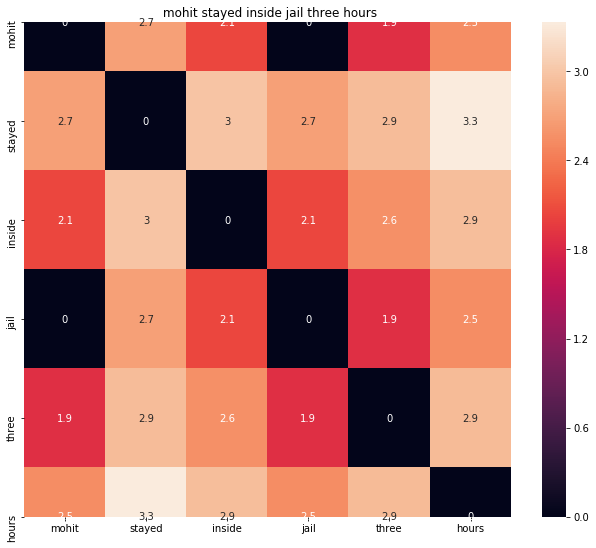

story_id : 5c2ac894bdec2256e05154db
title :  mohit stayed inside jail three hours
tags : ateeq ahmed deoria jail cctv footage mohit
euclidean distance from given input  : 0.0


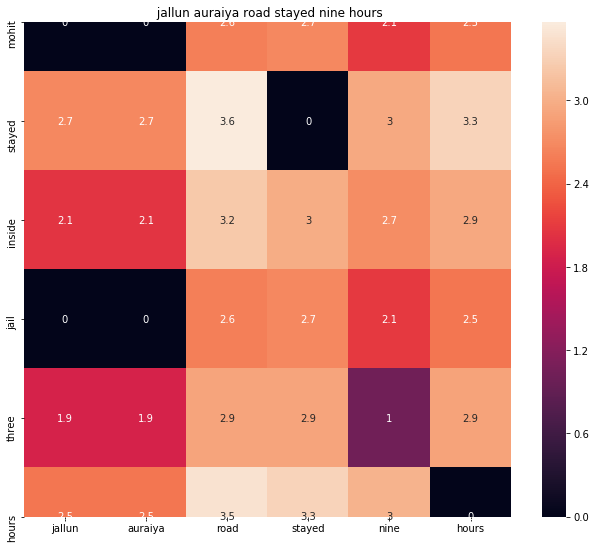

story_id : 5c83fed9bdec2213ed0cae11
title :  jallun auraiya road stayed nine hours
tags : jam
euclidean distance from given input  : 0.56979716


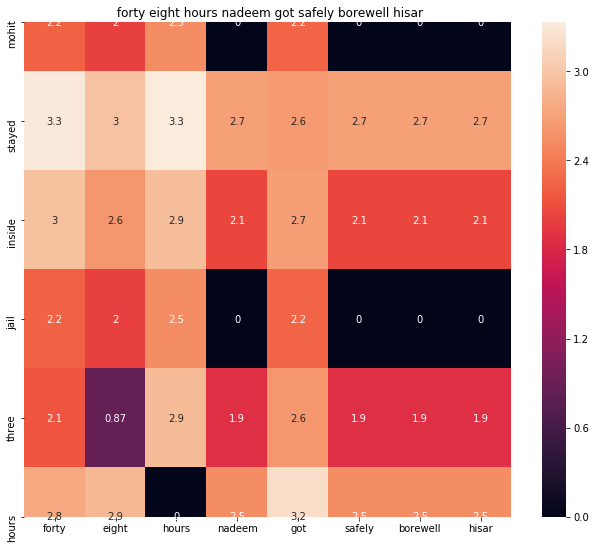

story_id : 5c953541bdec2214374a76b1
title :  forty eight hours nadeem got safely borewell hisar
tags : ndrf army nadeem borewell hisar
euclidean distance from given input  : 0.6395265


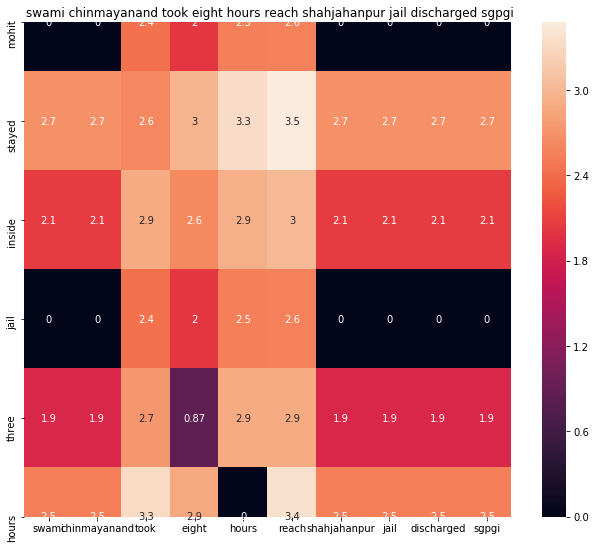

story_id : 5d9443298ebc3e0140318bf9
title :  swami chinmayanand took eight hours reach shahjahanpur jail discharged sgpgi
tags : shahjahanpur news swami chinmayanand bareilly news
euclidean distance from given input  : 0.64285636


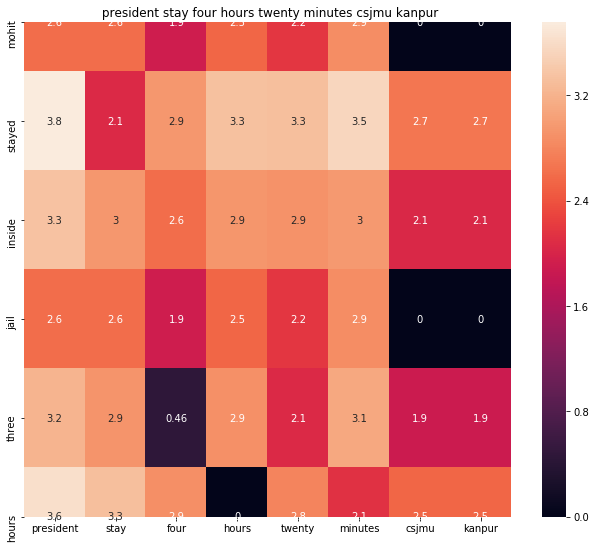

story_id : 5ddb8d938ebc3e54f446312c
title :  president stay four hours twenty minutes csjmu kanpur
tags : kanpur news kanpur up news president ram nath kovind csjmu kanpur
euclidean distance from given input  : 0.6800936


In [166]:
def avg_w2v_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # dist(x, y) = sqrt(dot(x, x) - 2 * dot(x, y) + dot(y, y))
    pairwise_dist = pairwise_distances(w2v_title, w2v_title[doc_id].reshape(1,-1))

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], indices[0], indices[i], 'avg')
        print('story_id :',data['story_id'].loc[df_indices[i]])
        print('title :',data['title'].loc[df_indices[i]])
        print('tags :',data['tags'].loc[df_indices[i]])
        print ('euclidean distance from given input  :', pdists[i])
        print('='*125)

        
avg_w2v_model(3, 5)
# in the give heat map, each cell contains the euclidean distance between words i, j

In [167]:
#IDF weighted Word2Vec for product similarity

In [168]:
doc_id = 0
w2v_title_weight = []
# for every title we build a weighted vector representation
for i in data['title']:
    w2v_title_weight.append(build_avg_vec(i, 300, doc_id,'weighted'))
    doc_id += 1
# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title_weight = np.array(w2v_title_weight)

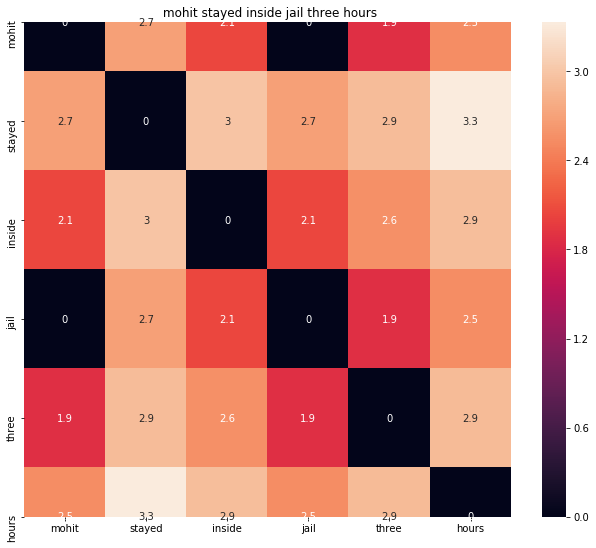

story_id : 5c2ac894bdec2256e05154db
tags : ateeq ahmed deoria jail cctv footage mohit
euclidean distance from input : 0.0


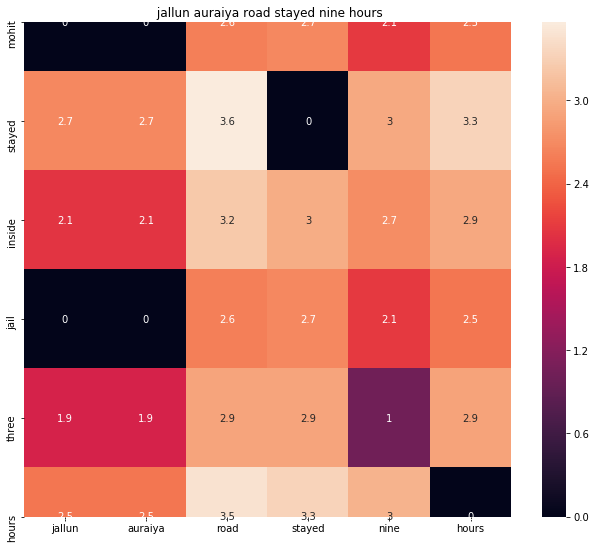

story_id : 5c83fed9bdec2213ed0cae11
tags : jam
euclidean distance from input : 0.56979716


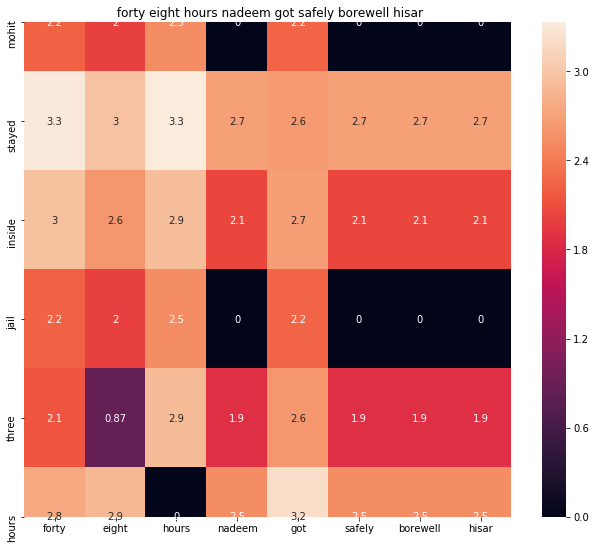

story_id : 5c953541bdec2214374a76b1
tags : ndrf army nadeem borewell hisar
euclidean distance from input : 0.6395265


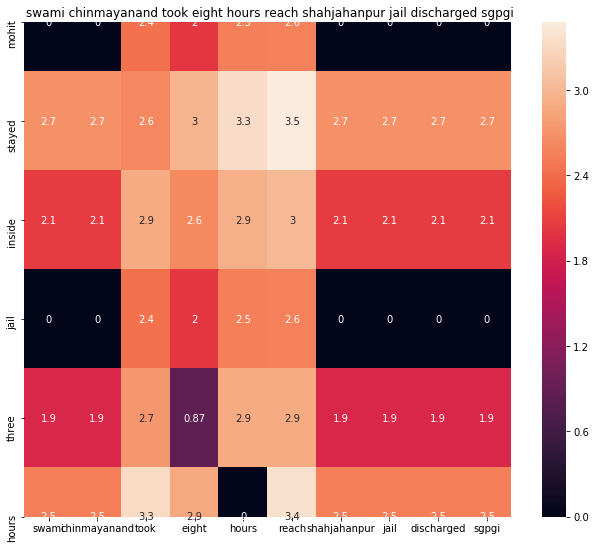

story_id : 5d9443298ebc3e0140318bf9
tags : shahjahanpur news swami chinmayanand bareilly news
euclidean distance from input : 0.64285636


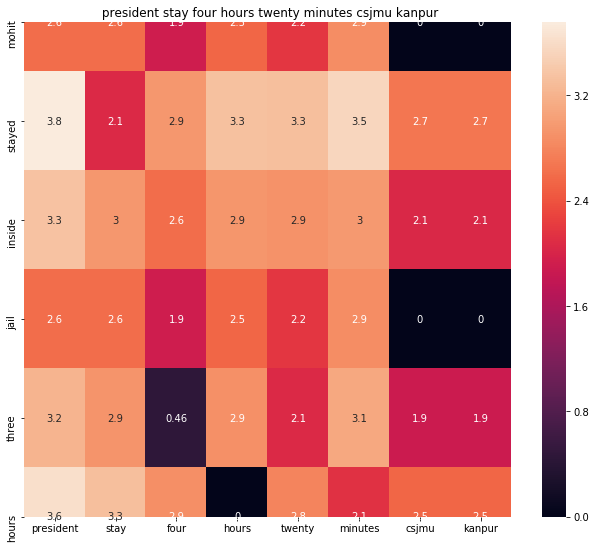

story_id : 5ddb8d938ebc3e54f446312c
tags : kanpur news kanpur up news president ram nath kovind csjmu kanpur
euclidean distance from input : 0.6800936


In [169]:
def weighted_w2v_model(doc_id, num_results):
   
    pairwise_dist = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], indices[0], indices[i], 'weighted')
        print('story_id :',data['story_id'].loc[df_indices[i]])
        print('tags :',data['tags'].loc[df_indices[i]])
        print('euclidean distance from input :', pdists[i])
        print('='*125)

weighted_w2v_model(3, 5)
#931
#12566
# in the give heat map, each cell contains the euclidean distance between words i, j

In [170]:
# Weighted similarity using tags and title.

In [171]:
'''
# some of the title values are empty. 
# Need to replace Null with string "NULL"
data['title'].fillna(value="Not given", inplace=True )
data['tags'].fillna(value="Not given", inplace=True )
data['geo_scope'].fillna(value="Not given", inplace=True )


# replace spaces with hypen
titles = [x.replace(" ", "-") for x in data['title'].values]
tags = [x.replace(" ", "-") for x in data['tags'].values]
geo_scope = [x.replace(" ", "-") for x in data['geo_scope'].values]

titles_vectorizer = CountVectorizer()
titles_features = titles_vectorizer.fit_transform(titles)

tags_vectorizer = CountVectorizer()
tags_features = tags_vectorizer.fit_transform(tags)

geo_scope_vectorizer = CountVectorizer()
geo_scope_features = geo_scope_vectorizer.fit_transform(geo_scope)

extra_features = hstack((titles_features, tags_features,geo_scope_features)).tocsr()

'''
titles = [x.replace(" ", "-") for x in data['title'].values]
tags = [x.replace(" ", "-") for x in data['tags'].values]
geo_scope = [x.replace(" ", "-") for x in data['geo_scope'].values]


tags_vectorizer = CountVectorizer()
tags_features = tags_vectorizer.fit_transform(tags)

extra_features=tags_features

In [172]:
def heat_map_w2v_tags(sentance1, sentance2, doc_id1, doc_id2, df_id1, df_id2, model):
    
    # sentance1 : title1, input apparel
    # sentance2 : title2, recommended apparel
    # url: apparel image url
    # doc_id1: document id of input apparel
    # doc_id2: document id of recommended apparel
    # df_id1: index of document1 in the data frame
    # df_id2: index of document2 in the data frame
    # model: it can have two values, 1. avg 2. weighted
    
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentance1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title2 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentance2, doc_id2, model)
    
    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    s1_s2_dist = get_distance(s1_vec, s2_vec)
   
    data_matrix = [['title','tags', 'geo_scope', 'views'],
               [data['story_id'].loc[df_id1], tags[doc_id1], geo_scope[doc_id1]], # input apparel's features
               [data['story_id'].loc[df_id2], tags[doc_id2], geo_scope[doc_id2]]] # recommonded apparel's features
    
    colorscale = [[0, '#1d004d'],[.5, '#f2e5ff'],[1, '#f2e5d1']] # to color the headings of each column 
    
    # we create a table with the data_matrix
    table = ff.create_table(data_matrix, index=True, colorscale=colorscale)
    # plot it with plotly
    plotly.offline.iplot(table, filename='simple_table')
    
    # devide whole figure space into 25 * 1:10 grids
    gs = gridspec.GridSpec(25, 15)
    fig = plt.figure(figsize=(25,5))
    
    # in first 25*10 grids we plot heatmap
    ax1 = plt.subplot(gs[:, :-5])
    # ploting the heap map based on the pairwise distances
    ax1 = sns.heatmap(np.round(s1_s2_dist,6), annot=True)
    # set the x axis labels as recommended apparels title
    ax1.set_xticklabels(sentance2.split())
    # set the y axis labels as input apparels title
    ax1.set_yticklabels(sentance1.split())
    # set title as recommended apparels title
    ax1.set_title(sentance2)

    # in last 25 * 10:15 grids we display image
   # ax2 = plt.subplot(gs[:, 10:16])
    # we dont display grid lins and axis labels to images
    #ax2.grid(False)
    ##ax2.set_xticks([])
    #ax2.set_yticks([])
    
    # pass the url it display it
    #display_img(url, ax2, fig)
    
    plt.show()

In [173]:
import plotly.figure_factory as ff
import plotly

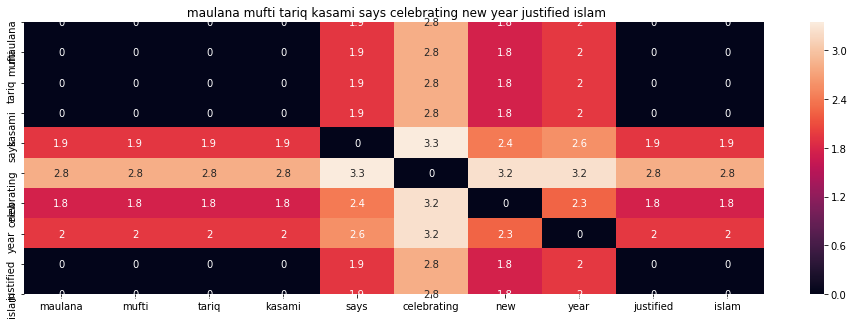

story_id : 5c2acbb9bdec2256b421f4d9
title :  maulana mufti tariq kasami says celebrating new year justified islam
tags : happy new year two thousand and nineteen हैप्पी न्यू ईयर two thousand and nineteen
euclidean distance from input : 4.13921144273546e-09


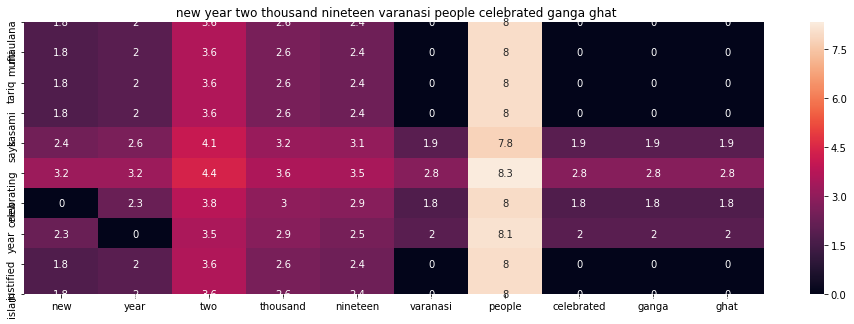

story_id : 5c2b2aecbdec2256ae0cbe23
title :  new year two thousand nineteen varanasi people celebrated ganga ghat
tags : happy new year two thousand and nineteen हैप्पी न्यू ईयर two thousand and nineteen
euclidean distance from input : 0.6119146558973524


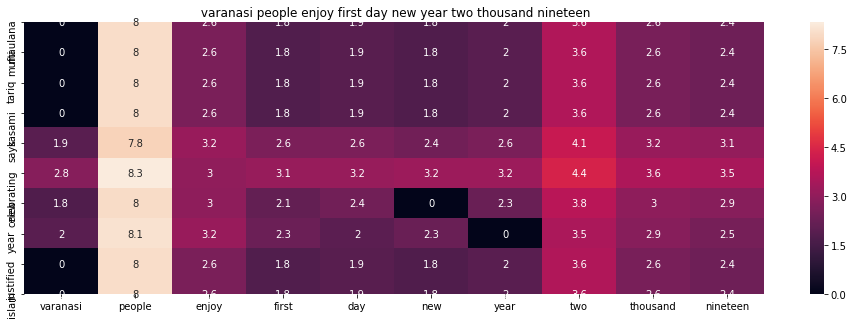

story_id : 5c2bb4bfbdec2256e821ee85
title :  varanasi people enjoy first day new year two thousand nineteen
tags : happy new year two thousand and nineteen हैप्पी न्यू ईयर two thousand and nineteen
euclidean distance from input : 0.6975159962972005


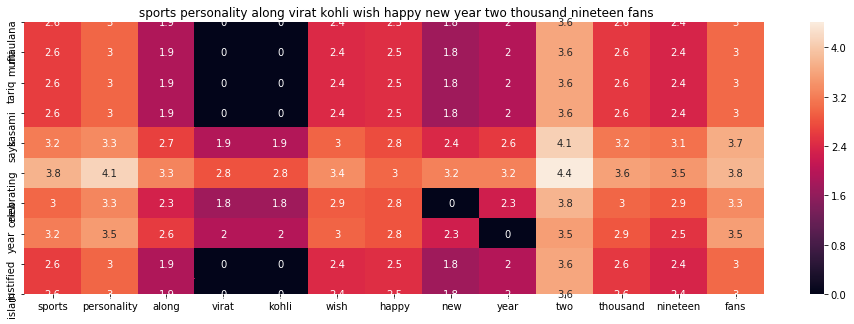

story_id : 5c2b0e2fbdec225706706767
title :  sports personality along virat kohli wish happy new year two thousand nineteen fans
tags : happy new year two thousand and nineteen virat kohli हैप्पी न्यू ईयर two thousand and nineteen
euclidean distance from input : 1.0953172897249563


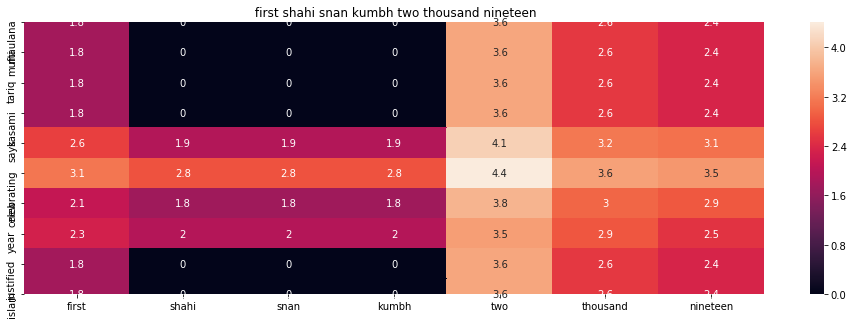

story_id : 5c3d4300bdec22738563cf01
title :  first shahi snan kumbh two thousand nineteen
tags : kumbh two thousand and nineteen कुंभ two thousand and nineteen
euclidean distance from input : 1.5445747441502973


In [174]:
def idf_w2v_tags(doc_id, w1, w2, num_results):
    # doc_id: apparel's id in given corpus
    # w1: weight for  w2v features
    # w2: weight for brand and color features

    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    idf_w2v_dist  = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))
    ex_feat_dist = pairwise_distances(extra_features, extra_features[doc_id])
    pairwise_dist   = (w1 * idf_w2v_dist +  w2 * ex_feat_dist)/float(w1 + w2)

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    

    for i in range(0, len(indices)):
        heat_map_w2v_tags(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], indices[0], indices[i],df_indices[0], df_indices[i], 'weighted')
        print('story_id :',data['story_id'].loc[df_indices[i]])
        print('title :',data['title'].loc[df_indices[i]])
        print('tags :',data['tags'].loc[df_indices[i]])
        print('euclidean distance from input :', pdists[i])
        print('='*125)

        
# tags weight =40
# title vector weight = 2        
idf_w2v_tags(4, 50, 40, 5)
# in the give heat map, each cell contains the euclidean distance between words i, j

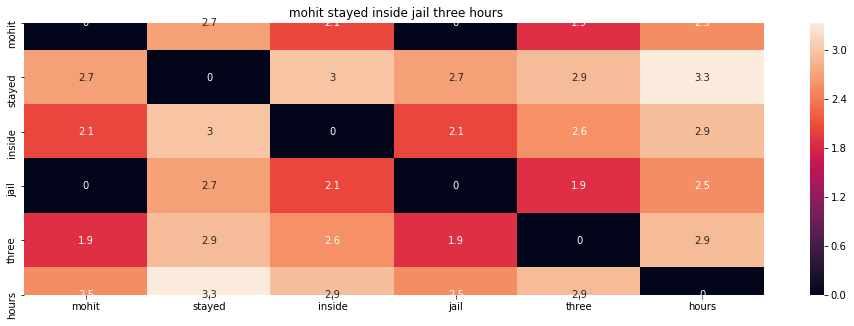

story_id : 5c2ac894bdec2256e05154db
title :  mohit stayed inside jail three hours
tags : ateeq ahmed deoria jail cctv footage mohit
euclidean distance from input : 0.0


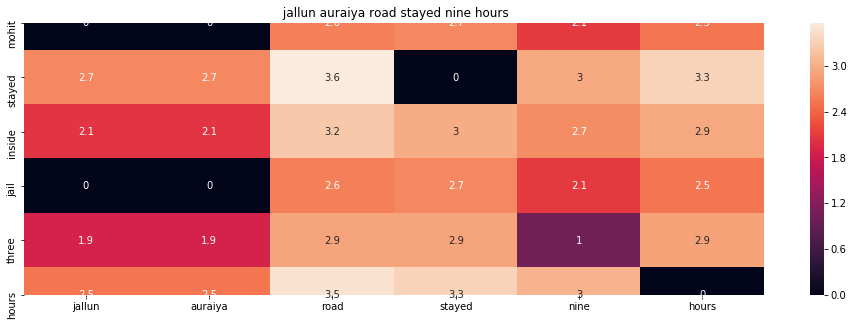

story_id : 5c83fed9bdec2213ed0cae11
title :  jallun auraiya road stayed nine hours
tags : jam
euclidean distance from input : 1.416783404621313


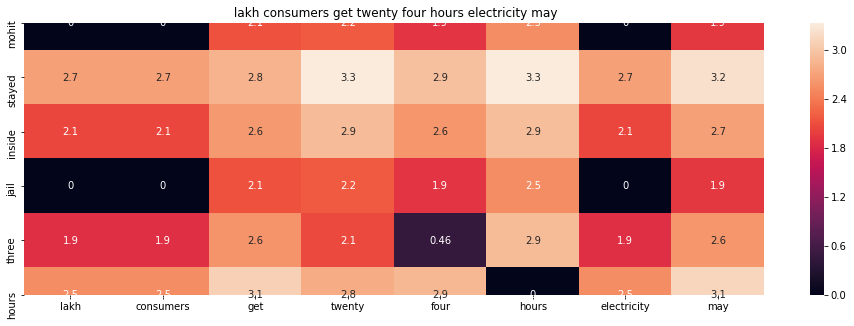

story_id : 5cc1fe4abdec22140967001b
title :  lakh consumers get twenty four hours electricity may
tags : improvment
euclidean distance from input : 1.4937406065790158


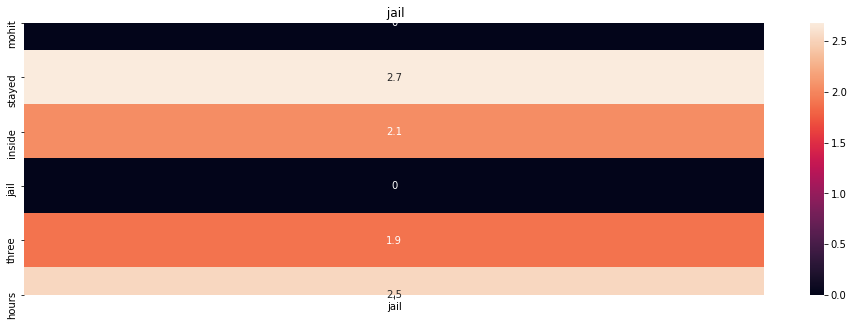

story_id : 5dd593908ebc3e5477445c8c
title :  jail
tags : jail
euclidean distance from input : 1.5207082354528714


In [175]:
# tags weight =30
# title vector weight = 50       
idf_w2v_tags(3, 50, 30, 4)

In [176]:
def heat_map_w2v_tags_model_top_100(sentance1, sentance2, doc_id1, doc_id2, df_id1, df_id2, model):
    
    # sentance1 : title1, input apparel
    # sentance2 : title2, recommended apparel
    # url: apparel image url
    # doc_id1: document id of input apparel
    # doc_id2: document id of recommended apparel
    # df_id1: index of document1 in the data frame
    # df_id2: index of document2 in the data frame
    # model: it can have two values, 1. avg 2. weighted
    
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentance1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title2 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentance2, doc_id2, model)
    
    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    
    return s1_vec, s2_vec
    
    #s1_s2_dist = get_distance(s1_vec, s2_vec)
    
    
    
'''
    data_matrix = [['title','tags', 'geo_scope', 'views'],
               [data['story_id'].loc[df_id1], tags[doc_id1], geo_scope[doc_id1]], # input apparel's features
               [data['story_id'].loc[df_id2], tags[doc_id2], geo_scope[doc_id2]]] # recommonded apparel's features
    
    colorscale = [[0, '#1d004d'],[.5, '#f2e5ff'],[1, '#f2e5d1']] # to color the headings of each column 
    
    # we create a table with the data_matrix
    table = ff.create_table(data_matrix, index=True, colorscale=colorscale)
    # plot it with plotly
    plotly.offline.iplot(table, filename='simple_table')
    
    # devide whole figure space into 25 * 1:10 grids
    gs = gridspec.GridSpec(25, 15)
    fig = plt.figure(figsize=(25,5))
    
    # in first 25*10 grids we plot heatmap
    ax1 = plt.subplot(gs[:, :-5])
    # ploting the heap map based on the pairwise distances
    ax1 = sns.heatmap(np.round(s1_s2_dist,6), annot=True)
    # set the x axis labels as recommended apparels title
    ax1.set_xticklabels(sentance2.split())
    # set the y axis labels as input apparels title
    ax1.set_yticklabels(sentance1.split())
    # set title as recommended apparels title
    ax1.set_title(sentance2)

    # in last 25 * 10:15 grids we display image
   # ax2 = plt.subplot(gs[:, 10:16])
    # we dont display grid lins and axis labels to images
    #ax2.grid(False)
    ##ax2.set_xticks([])
    #ax2.set_yticks([])
    
    # pass the url it display it
    #display_img(url, ax2, fig)
    
    plt.show()
'''
    

"\n    data_matrix = [['title','tags', 'geo_scope', 'views'],\n               [data['story_id'].loc[df_id1], tags[doc_id1], geo_scope[doc_id1]], # input apparel's features\n               [data['story_id'].loc[df_id2], tags[doc_id2], geo_scope[doc_id2]]] # recommonded apparel's features\n    \n    colorscale = [[0, '#1d004d'],[.5, '#f2e5ff'],[1, '#f2e5d1']] # to color the headings of each column \n    \n    # we create a table with the data_matrix\n    table = ff.create_table(data_matrix, index=True, colorscale=colorscale)\n    # plot it with plotly\n    plotly.offline.iplot(table, filename='simple_table')\n    \n    # devide whole figure space into 25 * 1:10 grids\n    gs = gridspec.GridSpec(25, 15)\n    fig = plt.figure(figsize=(25,5))\n    \n    # in first 25*10 grids we plot heatmap\n    ax1 = plt.subplot(gs[:, :-5])\n    # ploting the heap map based on the pairwise distances\n    ax1 = sns.heatmap(np.round(s1_s2_dist,6), annot=True)\n    # set the x axis labels as recommended appa

In [178]:
# to get top 100 recommendation without pictorial rep.

columns=[]
for i in range(100):
    s="story_id_{}".format(i)
    ta="tags_{}".format(i)
    ti="Title_{}".format(i)
    columns.append(s)
    columns.append(ta)
    columns.append(ti)


def idf_w2v_tags_model_top_100(doc_id, w1, w2, num_results):
    # doc_id: apparel's id in given corpus
    # w1: weight for  w2v features
    # w2: weight for brand and color features

    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    idf_w2v_dist  = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))
    ex_feat_dist = pairwise_distances(extra_features, extra_features[doc_id])
    pairwise_dist   = (w1 * idf_w2v_dist +  w2 * ex_feat_dist)/float(w1 + w2)

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    

    
    d=dict()
    j=0    
    for i in range(0, len(indices)):
        v1,v2=heat_map_w2v_tags_model_top_100(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], indices[0], indices[i],df_indices[0], df_indices[i], 'weighted')
        print('story_id :',data['story_id'].loc[df_indices[i]])
        print('title :',data['title'].loc[df_indices[i]])
        print('tags :',data['tags'].loc[df_indices[i]])
        print('euclidean distance from input :', pdists[i])
        print('='*125)
        
        d[columns[j]]=data['story_id'].loc[df_indices[i]]
        j=j+1
        d[columns[j]]=data['tags'].loc[df_indices[i]]
        j=j+1
        d[columns[j]]=data['title'].loc[df_indices[i]]
        j=j+1
    return d

        
# tags weight =30
# title vector weight = 2        
idf_w2v_tags_model_top_100(3, 50, 30, 4)
# in the give heat map, each cell contains the euclidean distance between words i, j

story_id : 5c2ac894bdec2256e05154db
title :  mohit stayed inside jail three hours
tags : ateeq ahmed deoria jail cctv footage mohit
euclidean distance from input : 0.0
story_id : 5c83fed9bdec2213ed0cae11
title :  jallun auraiya road stayed nine hours
tags : jam
euclidean distance from input : 1.416783404621313
story_id : 5cc1fe4abdec22140967001b
title :  lakh consumers get twenty four hours electricity may
tags : improvment
euclidean distance from input : 1.4937406065790158
story_id : 5dd593908ebc3e5477445c8c
title :  jail
tags : jail
euclidean distance from input : 1.5207082354528714


{'story_id_0': '5c2ac894bdec2256e05154db',
 'tags_0': 'ateeq ahmed deoria jail cctv footage mohit',
 'Title_0': ' mohit stayed inside jail three hours',
 'story_id_1': '5c83fed9bdec2213ed0cae11',
 'tags_1': 'jam',
 'Title_1': ' jallun auraiya road stayed nine hours',
 'story_id_2': '5cc1fe4abdec22140967001b',
 'tags_2': 'improvment',
 'Title_2': ' lakh consumers get twenty four hours electricity may',
 'story_id_3': '5dd593908ebc3e5477445c8c',
 'tags_3': 'jail',
 'Title_3': ' jail'}